<a href="https://colab.research.google.com/github/SVaishnaviVasa/IIITH-AIML-Vaishnavi/blob/main/Copy_of_AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

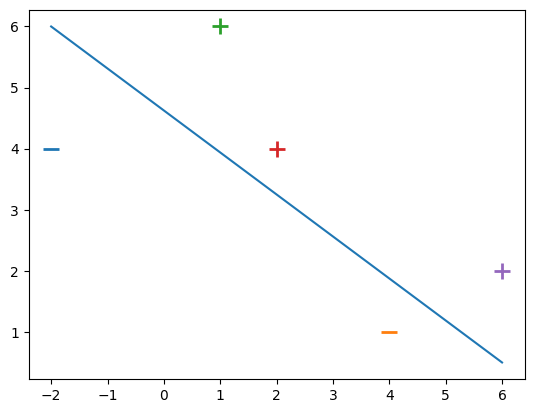

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

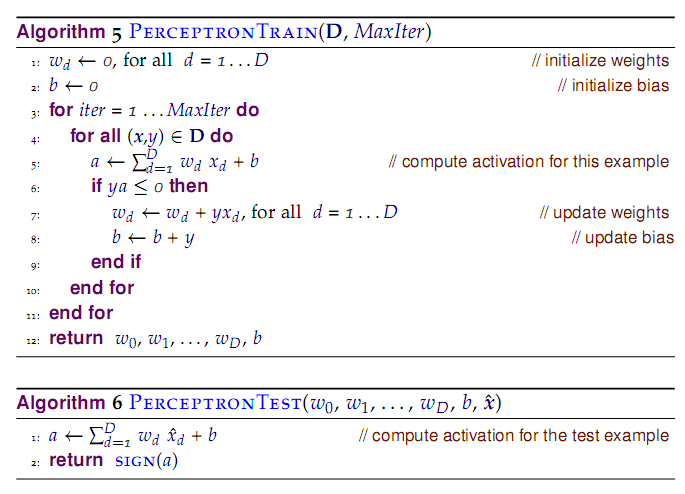

The algorithm is shown in the above image.

In [41]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [40]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

In [42]:
w = perceptron_algo_plot(X, y)

KeyError: ignored

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

NameError: ignored

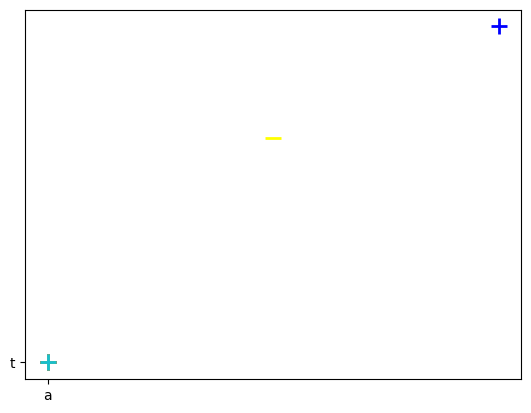

In [43]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



**Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.**

Accuracy on the test set: 100.00%
Insufficient dimensions in the weight vector for plotting.


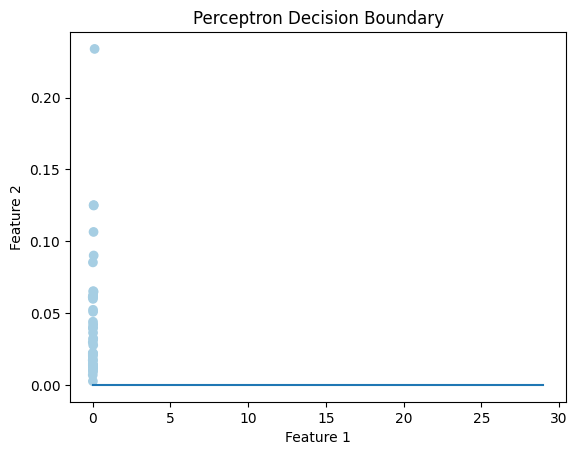

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

sonar = fetch_openml(name="sonar", version=1, parser='auto')  # Add parser='auto'
X, y = sonar.data, sonar.target

y = np.where(y == 'M', 1, -1)

X_2d = X.iloc[:, :2]

X_2d = X_2d.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

perceptron_weights = perceptron_algo_plot(X_train, y_train)

def predict(X, weights):
    return np.sign(np.dot(X, weights))

y_pred = predict(X_test, perceptron_weights)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')

if len(perceptron_weights) >= 3:
    slope = -perceptron_weights[1] / perceptron_weights[2]
    intercept = -perceptron_weights[0] / perceptron_weights[2]
    xx = np.linspace(X_test[:, 0].min(), X_test[:, 0].max())
    yy = slope * xx + intercept
    plt.plot(xx, yy, 'k-')
else:
    print("Insufficient dimensions in the weight vector for plotting.")

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


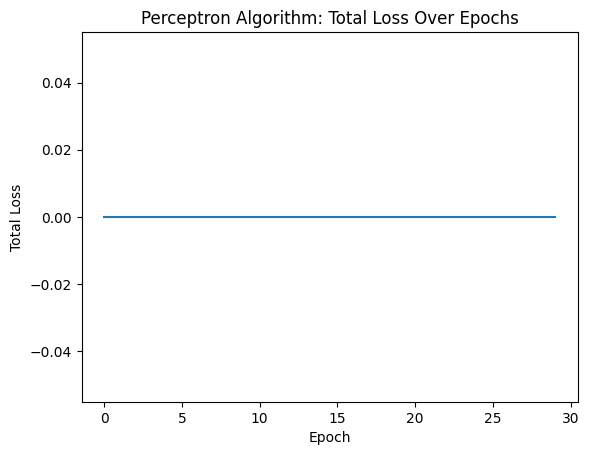

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

sonar = fetch_openml(name="sonar", version=1)
X, y = sonar.data, sonar.target

y = np.where(y == 'M', 1, -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def perceptron_algorithm(X, Y):
    w = np.zeros(X.shape[1])
    eta = 1
    epochs = 30
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    return w, errors

perceptron_weights, error_list = perceptron_algorithm(X_train.to_numpy(), y_train)

plt.plot(error_list)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Perceptron Algorithm: Total Loss Over Epochs')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


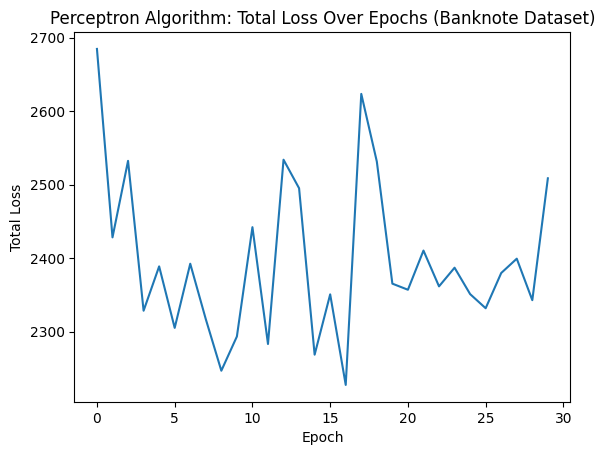

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

banknote = fetch_openml(name="banknote-authentication", version=1)
X, y = banknote.data, banknote.target

y = np.where(y == '0', -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def perceptron_algorithm(X, Y):
    w = np.zeros(X.shape[1])
    eta = 1
    epochs = 30
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    return w, errors

perceptron_weights, error_list = perceptron_algorithm(X_train.to_numpy(), y_train)

plt.plot(error_list)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Perceptron Algorithm: Total Loss Over Epochs (Banknote Dataset)')
plt.show()


**Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1, Total Loss: -2.6846528512369616
Epoch 2, Total Loss: -2.4283857748700197
Epoch 3, Total Loss: -2.532407535559813
Epoch 4, Total Loss: -2.3286097007723456
Epoch 5, Total Loss: -2.3889088358112773
Epoch 6, Total Loss: -2.3052848901874614
Epoch 7, Total Loss: -2.3925437725530427
Epoch 8, Total Loss: -2.317166422830459
Epoch 9, Total Loss: -2.2470345406190964
Epoch 10, Total Loss: -2.2935586166985784
Epoch 11, Total Loss: -2.4422316561388597
Epoch 12, Total Loss: -2.2833571603002984
Epoch 13, Total Loss: -2.5339937410202165
Epoch 14, Total Loss: -2.495182620889518
Epoch 15, Total Loss: -2.268819517131049
Epoch 16, Total Loss: -2.350882783509612
Epoch 17, Total Loss: -2.227709532739065
Epoch 18, Total Loss: -2.6234868807571137
Epoch 19, Total Loss: -2.531493866308943
Epoch 20, Total Loss: -2.3654241903296045
Epoch 21, Total Loss: -2.357146480313447
Epoch 22, Total Loss: -2.4104308612390084
Epoch 23, Total Loss: -2.361747011722482
Epoch 24, Total Loss: -2.387111744781046
Epoch 25, T

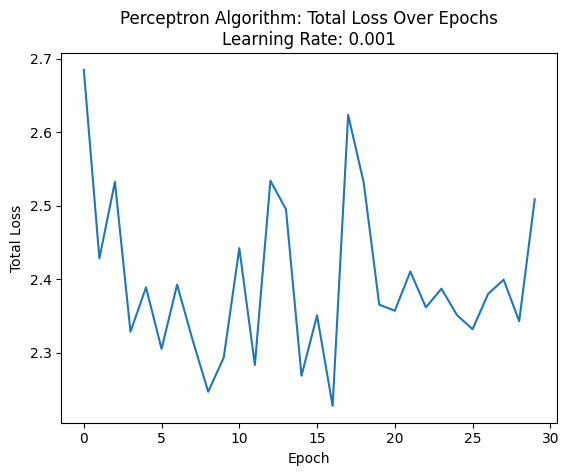

Epoch 1, Total Loss: -26.846528512369602
Epoch 2, Total Loss: -24.283857748700175
Epoch 3, Total Loss: -25.324075355598136
Epoch 4, Total Loss: -23.28609700772345
Epoch 5, Total Loss: -23.889088358112765
Epoch 6, Total Loss: -23.052848901874626
Epoch 7, Total Loss: -23.92543772553043
Epoch 8, Total Loss: -23.171664228304614
Epoch 9, Total Loss: -22.47034540619096
Epoch 10, Total Loss: -22.935586166985793
Epoch 11, Total Loss: -24.422316561388598
Epoch 12, Total Loss: -22.83357160300297
Epoch 13, Total Loss: -25.339937410202165
Epoch 14, Total Loss: -24.95182620889519
Epoch 15, Total Loss: -22.688195171310483
Epoch 16, Total Loss: -23.508827835096117
Epoch 17, Total Loss: -22.277095327390654
Epoch 18, Total Loss: -26.234868807571154
Epoch 19, Total Loss: -25.31493866308943
Epoch 20, Total Loss: -23.65424190329609
Epoch 21, Total Loss: -23.571464803134464
Epoch 22, Total Loss: -24.104308612390074
Epoch 23, Total Loss: -23.61747011722482
Epoch 24, Total Loss: -23.87111744781041
Epoch 25, 

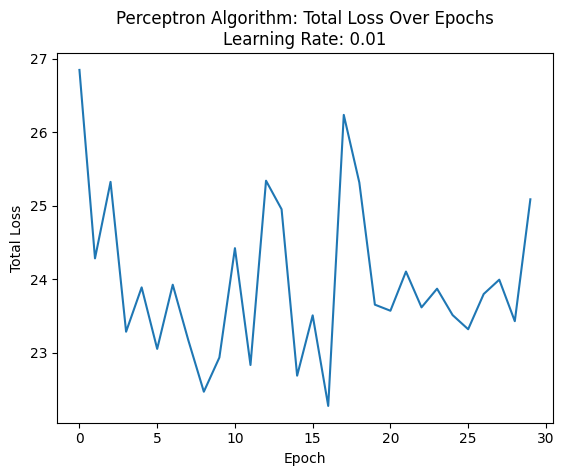

Epoch 1, Total Loss: -268.4652851236961
Epoch 2, Total Loss: -242.83857748700186
Epoch 3, Total Loss: -253.24075355598126
Epoch 4, Total Loss: -232.86097007723458
Epoch 5, Total Loss: -238.89088358112778
Epoch 6, Total Loss: -230.52848901874614
Epoch 7, Total Loss: -239.25437725530423
Epoch 8, Total Loss: -231.71664228304613
Epoch 9, Total Loss: -224.70345406190955
Epoch 10, Total Loss: -229.3558616698578
Epoch 11, Total Loss: -244.22316561388612
Epoch 12, Total Loss: -228.33571603002957
Epoch 13, Total Loss: -253.3993741020219
Epoch 14, Total Loss: -249.51826208895173
Epoch 15, Total Loss: -226.88195171310485
Epoch 16, Total Loss: -235.08827835096122
Epoch 17, Total Loss: -222.77095327390654
Epoch 18, Total Loss: -262.34868807571144
Epoch 19, Total Loss: -253.14938663089407
Epoch 20, Total Loss: -236.54241903296074
Epoch 21, Total Loss: -235.71464803134458
Epoch 22, Total Loss: -241.0430861239007
Epoch 23, Total Loss: -236.17470117224835
Epoch 24, Total Loss: -238.71117447810434
Epoch

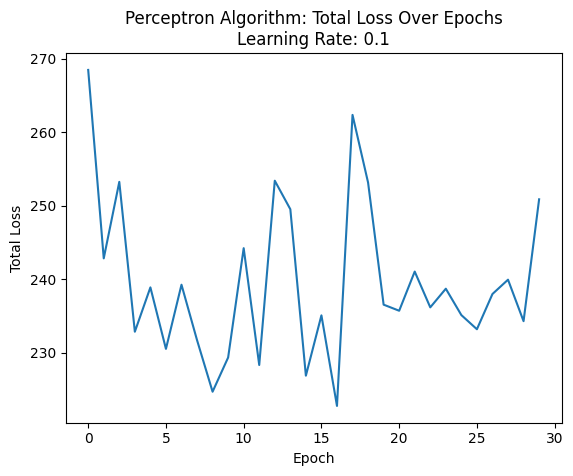

Epoch 1, Total Loss: -2684.6528512369605
Epoch 2, Total Loss: -2428.385774870018
Epoch 3, Total Loss: -2532.407535559813
Epoch 4, Total Loss: -2328.6097007723474
Epoch 5, Total Loss: -2388.9088358112767
Epoch 6, Total Loss: -2305.284890187462
Epoch 7, Total Loss: -2392.543772553043
Epoch 8, Total Loss: -2317.1664228304594
Epoch 9, Total Loss: -2247.034540619096
Epoch 10, Total Loss: -2293.5586166985786
Epoch 11, Total Loss: -2442.231656138859
Epoch 12, Total Loss: -2283.3571603002965
Epoch 13, Total Loss: -2533.993741020218
Epoch 14, Total Loss: -2495.1826208895186
Epoch 15, Total Loss: -2268.819517131048
Epoch 16, Total Loss: -2350.8827835096113
Epoch 17, Total Loss: -2227.7095327390643
Epoch 18, Total Loss: -2623.486880757114
Epoch 19, Total Loss: -2531.493866308944
Epoch 20, Total Loss: -2365.424190329607
Epoch 21, Total Loss: -2357.146480313446
Epoch 22, Total Loss: -2410.4308612390087
Epoch 23, Total Loss: -2361.747011722481
Epoch 24, Total Loss: -2387.111744781043
Epoch 25, Total

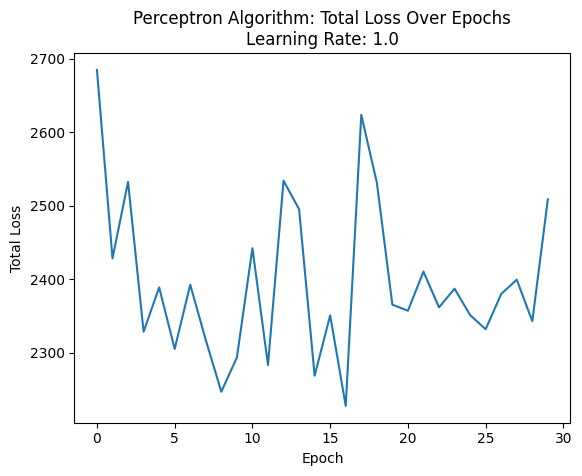

Epoch 1, Total Loss: -26846.5285123696
Epoch 2, Total Loss: -24283.857748700186
Epoch 3, Total Loss: -25324.07535559812
Epoch 4, Total Loss: -23286.097007723456
Epoch 5, Total Loss: -23889.088358112753
Epoch 6, Total Loss: -23052.84890187461
Epoch 7, Total Loss: -23925.43772553043
Epoch 8, Total Loss: -23171.66422830459
Epoch 9, Total Loss: -22470.345406190958
Epoch 10, Total Loss: -22935.58616698577
Epoch 11, Total Loss: -24422.316561388605
Epoch 12, Total Loss: -22833.571603002958
Epoch 13, Total Loss: -25339.937410202187
Epoch 14, Total Loss: -24951.826208895185
Epoch 15, Total Loss: -22688.19517131048
Epoch 16, Total Loss: -23508.827835096115
Epoch 17, Total Loss: -22277.09532739066
Epoch 18, Total Loss: -26234.868807571147
Epoch 19, Total Loss: -25314.938663089422
Epoch 20, Total Loss: -23654.24190329607
Epoch 21, Total Loss: -23571.464803134455
Epoch 22, Total Loss: -24104.30861239008
Epoch 23, Total Loss: -23617.47011722482
Epoch 24, Total Loss: -23871.117447810422
Epoch 25, Tot

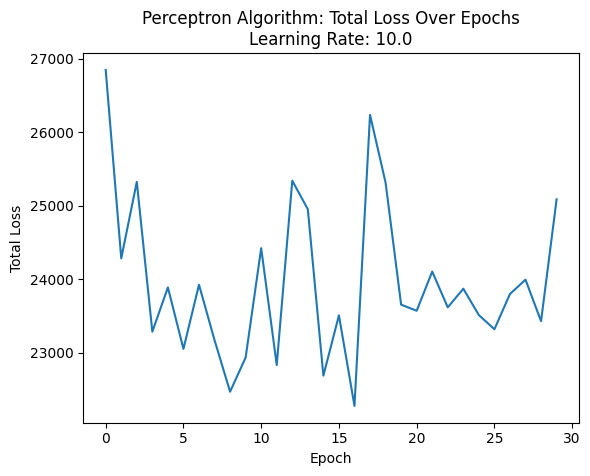

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

def perceptron_algorithm(X, Y, learning_rate):
    w = np.zeros(X.shape[1])
    epochs = 30
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + learning_rate * X[i] * Y[i]
        errors.append(total_error * -1)

        print(f'Epoch {epoch+1}, Total Loss: {total_error}')

    return w, errors

def plot_convergence(X_train, y_train, learning_rate):
    perceptron_weights, error_list = perceptron_algorithm(X_train, y_train, learning_rate)

    plt.plot(error_list)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Perceptron Algorithm: Total Loss Over Epochs\nLearning Rate: {learning_rate}')
    plt.show()

banknote = fetch_openml(name="banknote-authentication", version=1)
X, y = banknote.data, banknote.target

y = np.where(y == '0', -1, 1)

X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.001, 0.01, 0.1, 1.0, 10.0]

for lr in learning_rates:
    plot_convergence(X_train.to_numpy(), y_train, lr)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



Learning Rate: 0.001
Epoch 1, Total Loss: -2.6846528512369616
Epoch 2, Total Loss: -2.4283857748700197
Epoch 3, Total Loss: -2.532407535559813
Epoch 4, Total Loss: -2.3286097007723456
Epoch 5, Total Loss: -2.3889088358112773
Epoch 6, Total Loss: -2.3052848901874614
Epoch 7, Total Loss: -2.3925437725530427
Epoch 8, Total Loss: -2.317166422830459
Epoch 9, Total Loss: -2.2470345406190964
Epoch 10, Total Loss: -2.2935586166985784
Epoch 11, Total Loss: -2.4422316561388597
Epoch 12, Total Loss: -2.2833571603002984
Epoch 13, Total Loss: -2.5339937410202165
Epoch 14, Total Loss: -2.495182620889518
Epoch 15, Total Loss: -2.268819517131049
Epoch 16, Total Loss: -2.350882783509612
Epoch 17, Total Loss: -2.227709532739065
Epoch 18, Total Loss: -2.6234868807571137
Epoch 19, Total Loss: -2.531493866308943
Epoch 20, Total Loss: -2.3654241903296045
Epoch 21, Total Loss: -2.357146480313447
Epoch 22, Total Loss: -2.4104308612390084
Epoch 23, Total Loss: -2.361747011722482
Epoch 24, Total Loss: -2.38711

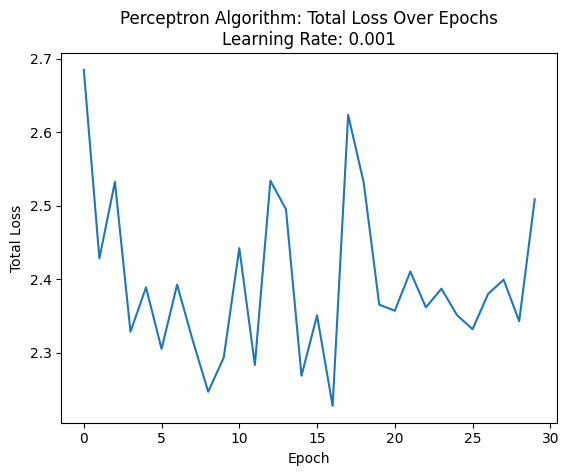


Learning Rate: 0.01
Epoch 1, Total Loss: -26.846528512369602
Epoch 2, Total Loss: -24.283857748700175
Epoch 3, Total Loss: -25.324075355598136
Epoch 4, Total Loss: -23.28609700772345
Epoch 5, Total Loss: -23.889088358112765
Epoch 6, Total Loss: -23.052848901874626
Epoch 7, Total Loss: -23.92543772553043
Epoch 8, Total Loss: -23.171664228304614
Epoch 9, Total Loss: -22.47034540619096
Epoch 10, Total Loss: -22.935586166985793
Epoch 11, Total Loss: -24.422316561388598
Epoch 12, Total Loss: -22.83357160300297
Epoch 13, Total Loss: -25.339937410202165
Epoch 14, Total Loss: -24.95182620889519
Epoch 15, Total Loss: -22.688195171310483
Epoch 16, Total Loss: -23.508827835096117
Epoch 17, Total Loss: -22.277095327390654
Epoch 18, Total Loss: -26.234868807571154
Epoch 19, Total Loss: -25.31493866308943
Epoch 20, Total Loss: -23.65424190329609
Epoch 21, Total Loss: -23.571464803134464
Epoch 22, Total Loss: -24.104308612390074
Epoch 23, Total Loss: -23.61747011722482
Epoch 24, Total Loss: -23.8711

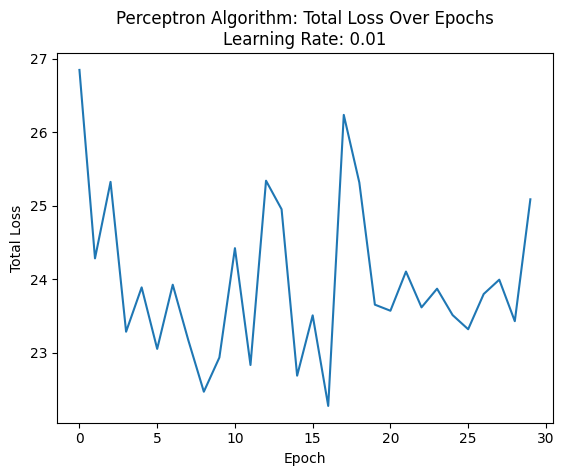


Learning Rate: 0.1
Epoch 1, Total Loss: -268.4652851236961
Epoch 2, Total Loss: -242.83857748700186
Epoch 3, Total Loss: -253.24075355598126
Epoch 4, Total Loss: -232.86097007723458
Epoch 5, Total Loss: -238.89088358112778
Epoch 6, Total Loss: -230.52848901874614
Epoch 7, Total Loss: -239.25437725530423
Epoch 8, Total Loss: -231.71664228304613
Epoch 9, Total Loss: -224.70345406190955
Epoch 10, Total Loss: -229.3558616698578
Epoch 11, Total Loss: -244.22316561388612
Epoch 12, Total Loss: -228.33571603002957
Epoch 13, Total Loss: -253.3993741020219
Epoch 14, Total Loss: -249.51826208895173
Epoch 15, Total Loss: -226.88195171310485
Epoch 16, Total Loss: -235.08827835096122
Epoch 17, Total Loss: -222.77095327390654
Epoch 18, Total Loss: -262.34868807571144
Epoch 19, Total Loss: -253.14938663089407
Epoch 20, Total Loss: -236.54241903296074
Epoch 21, Total Loss: -235.71464803134458
Epoch 22, Total Loss: -241.0430861239007
Epoch 23, Total Loss: -236.17470117224835
Epoch 24, Total Loss: -238.

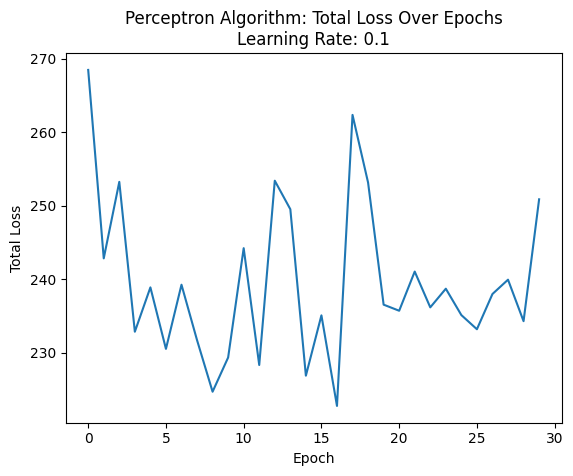


Learning Rate: 1.0
Epoch 1, Total Loss: -2684.6528512369605
Epoch 2, Total Loss: -2428.385774870018
Epoch 3, Total Loss: -2532.407535559813
Epoch 4, Total Loss: -2328.6097007723474
Epoch 5, Total Loss: -2388.9088358112767
Epoch 6, Total Loss: -2305.284890187462
Epoch 7, Total Loss: -2392.543772553043
Epoch 8, Total Loss: -2317.1664228304594
Epoch 9, Total Loss: -2247.034540619096
Epoch 10, Total Loss: -2293.5586166985786
Epoch 11, Total Loss: -2442.231656138859
Epoch 12, Total Loss: -2283.3571603002965
Epoch 13, Total Loss: -2533.993741020218
Epoch 14, Total Loss: -2495.1826208895186
Epoch 15, Total Loss: -2268.819517131048
Epoch 16, Total Loss: -2350.8827835096113
Epoch 17, Total Loss: -2227.7095327390643
Epoch 18, Total Loss: -2623.486880757114
Epoch 19, Total Loss: -2531.493866308944
Epoch 20, Total Loss: -2365.424190329607
Epoch 21, Total Loss: -2357.146480313446
Epoch 22, Total Loss: -2410.4308612390087
Epoch 23, Total Loss: -2361.747011722481
Epoch 24, Total Loss: -2387.11174478

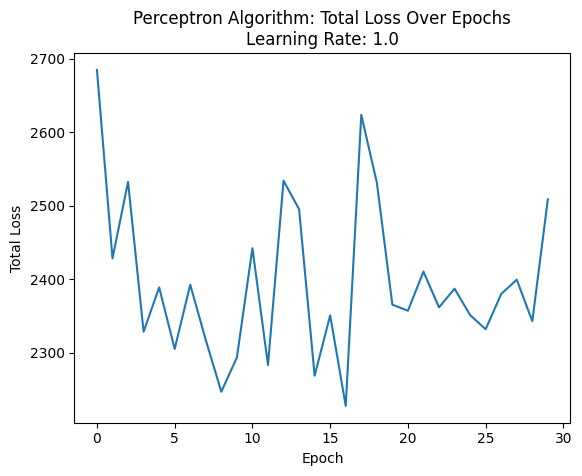


Learning Rate: 10.0
Epoch 1, Total Loss: -26846.5285123696
Epoch 2, Total Loss: -24283.857748700186
Epoch 3, Total Loss: -25324.07535559812
Epoch 4, Total Loss: -23286.097007723456
Epoch 5, Total Loss: -23889.088358112753
Epoch 6, Total Loss: -23052.84890187461
Epoch 7, Total Loss: -23925.43772553043
Epoch 8, Total Loss: -23171.66422830459
Epoch 9, Total Loss: -22470.345406190958
Epoch 10, Total Loss: -22935.58616698577
Epoch 11, Total Loss: -24422.316561388605
Epoch 12, Total Loss: -22833.571603002958
Epoch 13, Total Loss: -25339.937410202187
Epoch 14, Total Loss: -24951.826208895185
Epoch 15, Total Loss: -22688.19517131048
Epoch 16, Total Loss: -23508.827835096115
Epoch 17, Total Loss: -22277.09532739066
Epoch 18, Total Loss: -26234.868807571147
Epoch 19, Total Loss: -25314.938663089422
Epoch 20, Total Loss: -23654.24190329607
Epoch 21, Total Loss: -23571.464803134455
Epoch 22, Total Loss: -24104.30861239008
Epoch 23, Total Loss: -23617.47011722482
Epoch 24, Total Loss: -23871.11744

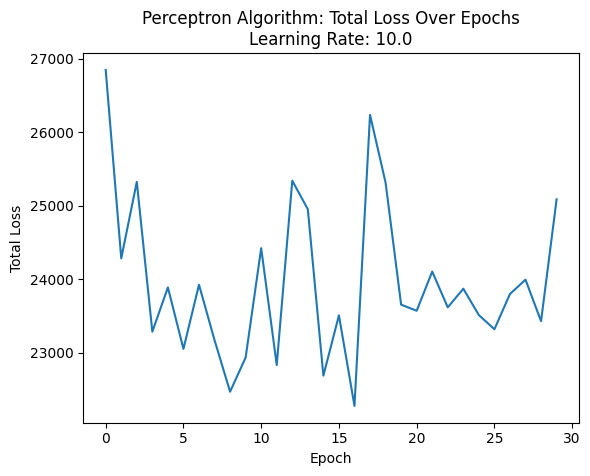


Learning Rate: 100.0
Epoch 1, Total Loss: -268465.28512369614
Epoch 2, Total Loss: -242838.57748700184
Epoch 3, Total Loss: -253240.7535559814
Epoch 4, Total Loss: -232860.97007723452
Epoch 5, Total Loss: -238890.8835811277
Epoch 6, Total Loss: -230528.48901874622
Epoch 7, Total Loss: -239254.3772553043
Epoch 8, Total Loss: -231716.64228304592
Epoch 9, Total Loss: -224703.45406190975
Epoch 10, Total Loss: -229355.861669858
Epoch 11, Total Loss: -244223.1656138858
Epoch 12, Total Loss: -228335.71603002967
Epoch 13, Total Loss: -253399.3741020217
Epoch 14, Total Loss: -249518.2620889518
Epoch 15, Total Loss: -226881.95171310488
Epoch 16, Total Loss: -235088.27835096105
Epoch 17, Total Loss: -222770.95327390658
Epoch 18, Total Loss: -262348.6880757112
Epoch 19, Total Loss: -253149.3866308942
Epoch 20, Total Loss: -236542.41903296066
Epoch 21, Total Loss: -235714.6480313446
Epoch 22, Total Loss: -241043.08612390066
Epoch 23, Total Loss: -236174.7011722482
Epoch 24, Total Loss: -238711.174

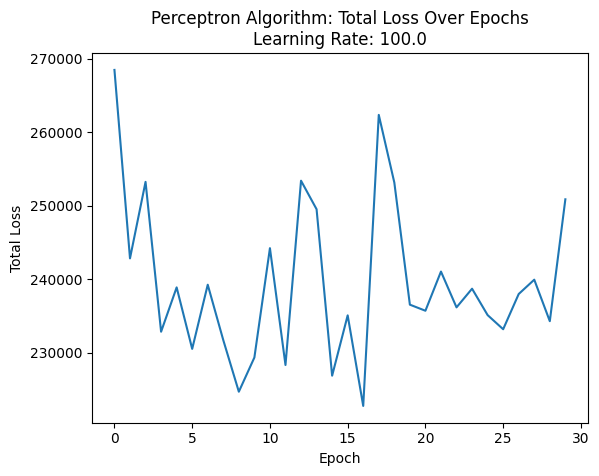

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

def perceptron_algorithm(X, Y, learning_rate):
    w = np.zeros(X.shape[1])
    epochs = 30
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + learning_rate * X[i] * Y[i]
        errors.append(total_error * -1)
        print(f'Epoch {epoch+1}, Total Loss: {total_error}')

    return w, errors

def plot_convergence(X_train, y_train, learning_rate):
    perceptron_weights, error_list = perceptron_algorithm(X_train, y_train, learning_rate)

    plt.plot(error_list)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Perceptron Algorithm: Total Loss Over Epochs\nLearning Rate: {learning_rate}')
    plt.show()

banknote = fetch_openml(name="banknote-authentication", version=1)
X, y = banknote.data, banknote.target

y = np.where(y == '0', -1, 1)

X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

for lr in learning_rates:
    print(f'\nLearning Rate: {lr}')
    plot_convergence(X_train.to_numpy(), y_train, learning_rate=lr)


In perceptron algorithm, using an excessively large learning rate could lead to divergence rather than convergence. The perceptron update rule is based on the idea of adjusting weights by a factor proportional to the input and the error. When the learning rate is too large, the updates can become too aggressive, and the algorithm might fail to find a stable solution.

**Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.**

Final Weight Vector: [0. 4. 7.]


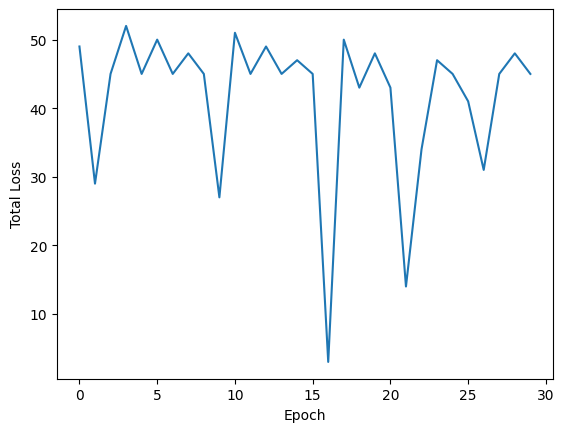

In [44]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
    [1, 2, -1],
])
y = np.array([-1, -1, 1, -1, -1, 1])

perceptron_weights = perceptron_algo_plot(X, y)

print(f'Final Weight Vector: {perceptron_weights}')

Final Weight Vector: [-3.  4. 16.]


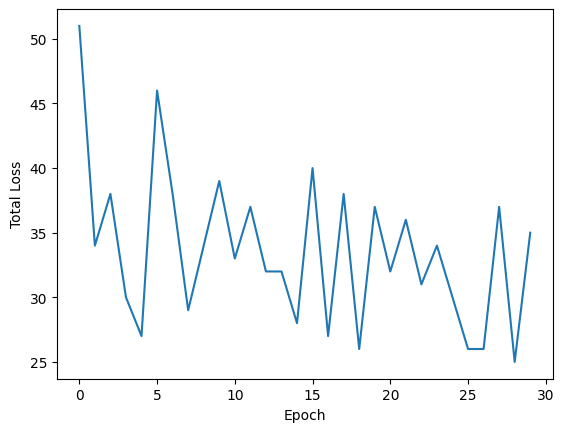

In [45]:


X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 3, -1],
    [6, 2, -1],
])

y = np.array([-1, -1, 1, 1, -1])

perceptron_weights = perceptron_algo_plot(X, y)

print(f'Final Weight Vector: {perceptron_weights}')

**GIVEN EXAMPLE**

In [46]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [47]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


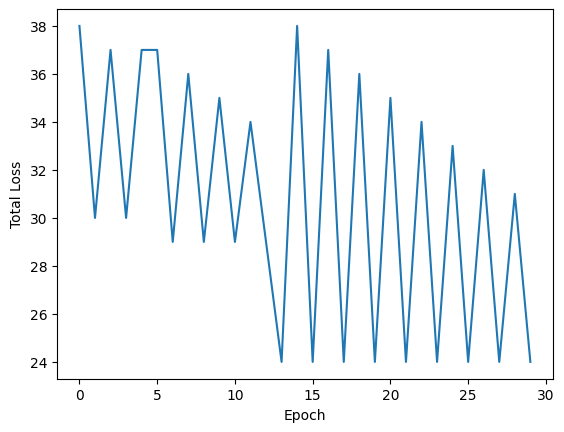

In [48]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.